In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
import nltk
import re
import string

In [ ]:
#reading csv file
trdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/F2train.csv" )
trdata = trdata.drop(["id","title","author"],axis=1)
trdata.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing Process

In [ ]:
def removeChar(text):
    if type(text) is str:
        text = text.lower()
        text = re.sub('!,?','',text)
        text = re.sub("'",'',text)
        text = re.sub('https?://\S+|www\.\S+','',text)
        text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    return text



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopping(text):
  if type(text) is str:
     text = text.split()
     stops = set(stopwords.words("english"))
     text = [w for w in text if not w in stops]
     text = " ".join(text) 
  return text


#Preprocessing for training data
trdata['text'] = trdata['text'].apply(stopping)
trdata['text'] = trdata['text'].apply(removeChar) 
trdata.head(10)  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label
0,house dem aide we didn’t even see comey’s lett...,1
1,ever get feeling life circles roundabout rathe...,0
2,why truth might get you fired october 29 2016 ...,1
3,videos 15 civilians killed in single us airstr...,1
4,print an iranian woman sentenced six years pri...,1
5,in trying times jackie mason voice reason in w...,0
6,ever wonder britain’s iconic pop pianist gets ...,1
7,paris — france chose idealistic traditional ca...,0
8,donald j trump scheduled make highly anticipat...,0
9,a week michael t flynn resigned national secur...,0


In [ ]:
x = trdata['text']
y = trdata['label']
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=6)


# Feature Extraction Process for training data
from sklearn.feature_extraction.text import TfidfVectorizer
Vec = TfidfVectorizer()
xf_train = Vec.fit_transform(x_train.astype(str))
xf_test = Vec.transform(x_test.astype(str))



# Logistic Regression 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error
Log = LogisticRegression()
Log.fit(xf_train,y_train)
Log.score(xf_test,y_test)

0.9544230769230769

In [ ]:
Pred = Log.predict(xf_test)
print(classification_report(y_test,Pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2600
           1       0.95      0.96      0.95      2600

    accuracy                           0.95      5200
   macro avg       0.95      0.95      0.95      5200
weighted avg       0.95      0.95      0.95      5200



In [ ]:
LR_MAPE = mean_absolute_error(y_test,Pred)
print(LR_MAPE)

0.04557692307692308


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




[[2462  138]
 [  99 2501]]




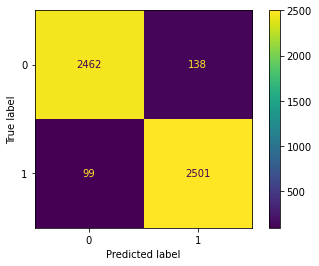

In [ ]:
plot_confusion_matrix(Log,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred))
print("\n")

# Support Vector Machines 

In [ ]:
from sklearn import svm
SuVeMa = svm.SVC(kernel='linear', gamma= 'auto', C=2)
SuVeMa.fit(xf_train,y_train)
SuVeMa.score(xf_test,y_test)

0.9682692307692308

In [ ]:
Pred1 = SuVeMa.predict(xf_test)
print(classification_report(y_test,Pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2600
           1       0.97      0.97      0.97      2600

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



In [ ]:
SVM_MAPE = mean_absolute_error(y_test,Pred1)
print(SVM_MAPE)

1.1120216004888208




[[2514   86]
 [  79 2521]]




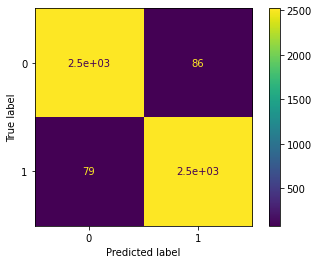

In [ ]:
plot_confusion_matrix(SuVeMa,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred1))
print("\n")

# K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xf_train,y_train)
knn.score(xf_test,y_test)

0.62

In [ ]:
Pred2 = knn.predict(xf_test)
print(classification_report(y_test,Pred2))

              precision    recall  f1-score   support

           0       0.95      0.25      0.40      2600
           1       0.57      0.99      0.72      2600

    accuracy                           0.62      5200
   macro avg       0.76      0.62      0.56      5200
weighted avg       0.76      0.62      0.56      5200



In [ ]:
KNN_MAPE = mean_absolute_error(y_test,Pred2)
print(KNN_MAPE)

0.38


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




[[ 660 1940]
 [  36 2564]]




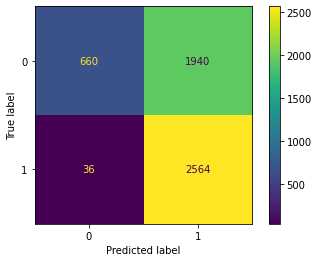

In [ ]:
plot_confusion_matrix(knn,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred2))
print("\n")

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xf_train,y_train)
dt.score(xf_test,y_test)

0.8878846153846154

In [ ]:
Pred4 = dt.predict(xf_test)
print(classification_report(y_test,Pred4))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2600
           1       0.89      0.89      0.89      2600

    accuracy                           0.89      5200
   macro avg       0.89      0.89      0.89      5200
weighted avg       0.89      0.89      0.89      5200



In [ ]:
DTC_MAPE = mean_absolute_error(y_test,Pred4)
print(DTC_MAPE)

0.11211538461538462




[[2306  294]
 [ 289 2311]]




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


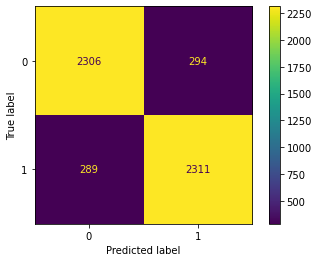

In [ ]:
plot_confusion_matrix(dt,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred4))
print("\n")

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(xf_train,y_train)
gb.score(xf_test,y_test)


0.931923076923077

In [ ]:
Pred5 = gb.predict(xf_test)
print(classification_report(y_test,Pred5))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2600
           1       0.92      0.95      0.93      2600

    accuracy                           0.93      5200
   macro avg       0.93      0.93      0.93      5200
weighted avg       0.93      0.93      0.93      5200



In [ ]:
GBC_MAPE = mean_absolute_error(y_test,Pred5)
print(GBC_MAPE)

0.06807692307692308




[[2381  219]
 [ 135 2465]]




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


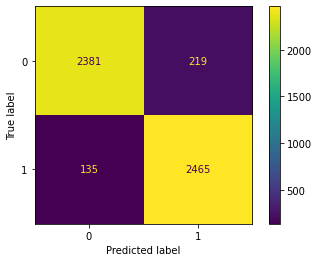

In [ ]:
plot_confusion_matrix(gb,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred5))
print("\n")

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(xf_train, y_train)
rf.score(xf_test,y_test)

0.9234615384615384

In [ ]:
Pred6 = rf.predict(xf_test)
print(classification_report(y_test,Pred6))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2600
           1       0.95      0.90      0.92      2600

    accuracy                           0.92      5200
   macro avg       0.92      0.92      0.92      5200
weighted avg       0.92      0.92      0.92      5200



In [ ]:
RFC_MAPE = mean_absolute_error(y_test,Pred6)
print(RFC_MAPE)

0.07653846153846154




[[2471  129]
 [ 269 2331]]




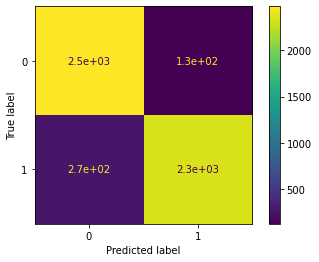

In [ ]:
plot_confusion_matrix(rf,xf_test,y_test)
print("\n")
print(confusion_matrix(y_test,Pred6))
print("\n")

# Neural Networks 


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
wordsVec = 50000
oneHot = [one_hot(words,wordsVec)for words in trdata['text'].astype(str)]

In [ ]:
s_length = 20
embedded = pad_sequences(oneHot,padding='pre',maxlen=s_length)
print(embedded)

[[13558 46236  8838 ... 45331 11366 29685]
 [32980 45134  3301 ... 41830 47413 15186]
 [42542 17522  2601 ...  5600 26027 36887]
 ...
 [30930 49878 25924 ... 31178 13422 26351]
 [13529 23350 43059 ... 14013 42308 18202]
 [39319  3318 22549 ...  1041 15723 49838]]


In [ ]:
embedded_Vec_features = 40
model=Sequential()
model.add(Embedding(wordsVec,embedded_Vec_features,input_length=s_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
X1 = np.array(embedded)
Y1 = np.array(y)
X1.shape,Y1.shape

((20800, 20), (20800,))

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.25, random_state=6)
History = model.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=20,batch_size=32)

Epoch 1/20
488/488 [==============================] - 23s 42ms/step - loss: 0.3127 - accuracy: 0.8535 - val_loss: 0.2340 - val_accuracy: 0.9000
Epoch 2/20
488/488 [==============================] - 20s 41ms/step - loss: 0.0989 - accuracy: 0.9628 - val_loss: 0.2718 - val_accuracy: 0.8925
Epoch 3/20
488/488 [==============================] - 20s 41ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.3639 - val_accuracy: 0.8900
Epoch 4/20
488/488 [==============================] - 20s 41ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.6050 - val_accuracy: 0.8781
Epoch 5/20
488/488 [==============================] - 20s 41ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 0.6813 - val_accuracy: 0.8785
Epoch 6/20
488/488 [==============================] - 20s 41ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.5156 - val_accuracy: 0.8865
Epoch 7/20
488/488 [==============================] - 20s 40ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.6499 - val_accuracy:

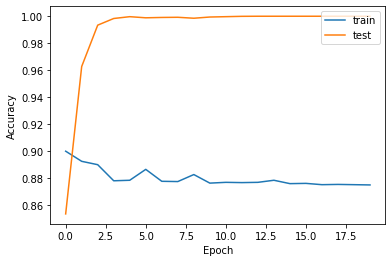

In [ ]:
import matplotlib.pyplot as plt
plt.plot(History.history['val_accuracy'])
plt.plot(History.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')

# ROC and AUC For SVM and logistic Regression

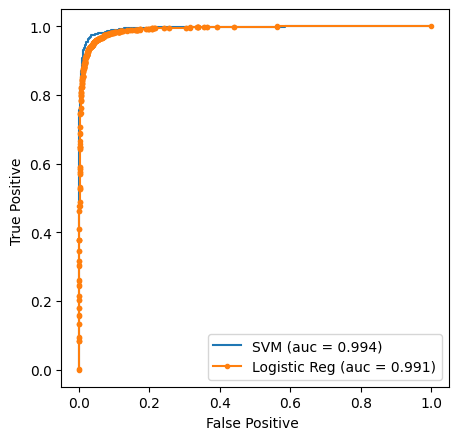

In [ ]:
Pred = Log.decision_function(xf_test)
Pred1 = SuVeMa.decision_function(xf_test)
#Pred6 = rf.decision_function(xf_test)
#Logistic Regression fpr,tpr
log_fpr, log_tpr, threshold = roc_curve(y_test, Pred)
auc_log = auc(log_fpr, log_tpr)

#SVM fpr,tpr
svm_fpr, svm_tpr, threshold = roc_curve(y_test, Pred1)
auc_svm = auc(svm_fpr, svm_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Reg (auc = %0.3f)' % auc_log)



plt.xlabel('False Positive ')
plt.ylabel('True Positive ')

plt.legend()

plt.show()

# Summary For All Models Accuracy

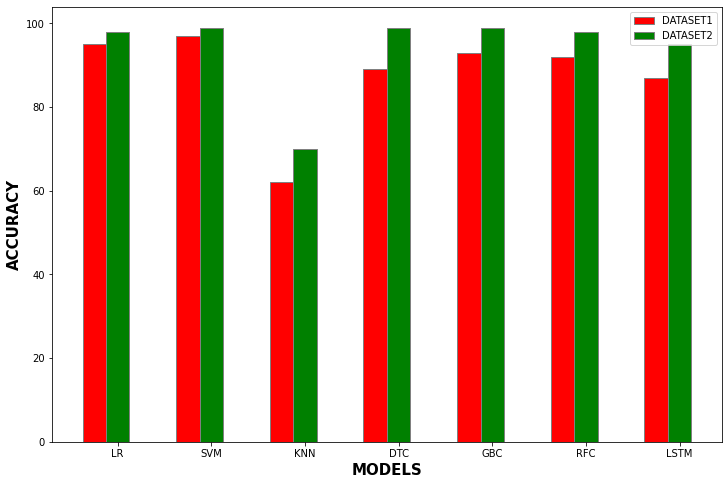

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
DATASET1 = [95, 97, 62, 89, 93,92,87]
DATASET2 = [98, 99, 70, 99, 99,98,95]

br1 = np.arange(len(DATASET1))
br2 = [x + barWidth for x in br1]

plt.bar(br1, DATASET1, color ='r', width = barWidth,
        edgecolor ='grey', label ='DATASET1')
plt.bar(br2, DATASET2, color ='g', width = barWidth,
        edgecolor ='grey', label ='DATASET2')

plt.xlabel('MODELS', fontweight ='bold', fontsize = 15)
plt.ylabel('ACCURACY', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(DATASET1))],
        ['LR', 'SVM', 'KNN', 'DTC', 'GBC','RFC','LSTM'])
 
plt.legend()
plt.show()

# Summary For All Models Classification Reports DATASET1

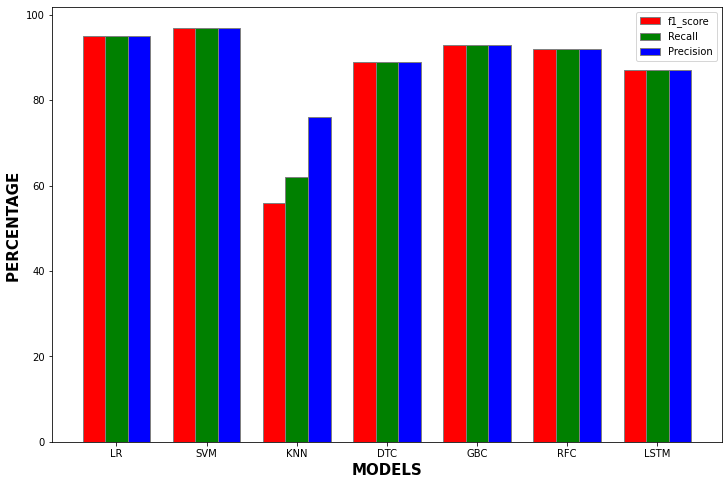

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
f1_score = [95, 97, 56, 89, 93,92,87]
Recall = [95, 97, 62, 89, 93,92,87]
Precision = [95, 97, 76, 89, 93,92,87]

br1 = np.arange(len(f1_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, f1_score, color ='r', width = barWidth,
        edgecolor ='grey', label ='f1_score')
plt.bar(br2, Recall, color ='g', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br3, Precision, color ='b', width = barWidth,
        edgecolor ='grey', label ='Precision')

plt.xlabel('MODELS', fontweight ='bold', fontsize = 15)
plt.ylabel('PERCENTAGE ', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(f1_score))],
        ['LR', 'SVM', 'KNN', 'DTC', 'GBC','RFC','LSTM'])
 
plt.legend()
plt.show()

# Summary For All Models Classification Reports DATASET2

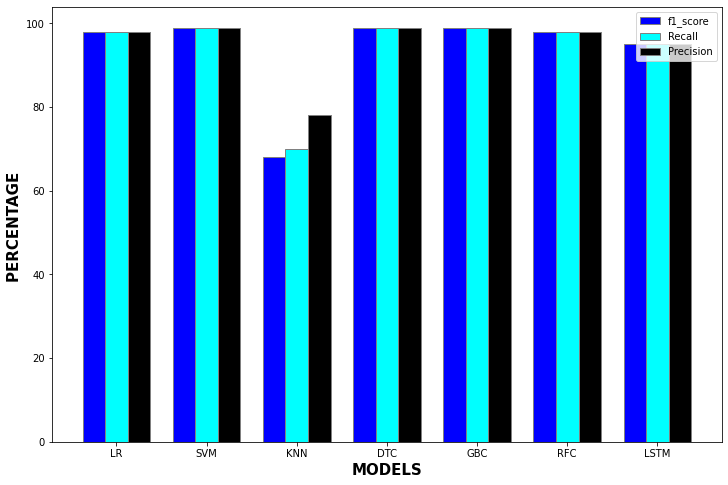

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
f1_score = [98, 99, 68, 99, 99,98,95]
Recall = [98, 99, 70, 99, 99,98,95]
Precision = [98, 99, 78, 99, 99,98,95]

br1 = np.arange(len(f1_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, f1_score, color ='blue', width = barWidth,
        edgecolor ='grey', label ='f1_score')
plt.bar(br2, Recall, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br3, Precision, color ='black', width = barWidth,
        edgecolor ='grey', label ='Precision')

plt.xlabel('MODELS', fontweight ='bold', fontsize = 15)
plt.ylabel('PERCENTAGE ', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(f1_score))],
        ['LR', 'SVM', 'KNN', 'DTC', 'GBC','RFC','LSTM'])
 
plt.legend()
plt.show()